In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Training data

In [2]:
train= pd.read_csv(r'C:\Users\nguyent2\Desktop\Kaggle-Competition-on-HR-Analytics-Employee-Promotion-Data\dataset\train.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


**Features** <br/>
employee_id<br/>
department<br/>
region<br/>
education<br/>
gender<br/>
recruitment_channel<br/>
no_of_trainings<br/>
age<br/>
previous_year_rating<br/>
length_of_service<br/>
awards_won?<br/>
avg_training_score<br/>
is_promoted<br/>

Visualization

In [3]:
#Count how many different departments
#Check if there is ISNULL information in any column

print(train['employee_id'].nunique(), "different employee_id items")

print(train['employee_id'].isnull().sum())

print(train['department'].nunique(), "different departments")

print(train['department'].isnull().sum())

print(train['region'].nunique(), "different regions")

print(train['region'].isnull().sum())

print(train['education'].nunique(), "different education items")

print(train['education'].isnull().sum())

print(train['gender'].nunique(), "different genders")

print(train['gender'].isnull().sum())

print(train['recruitment_channel'].nunique(), "different recruitment channels")

print(train['recruitment_channel'].isnull().sum())

print(train['no_of_trainings'].nunique(), "different no of trainings")

print(train['no_of_trainings'].isnull().sum())

print(train['age'].nunique(), "different ages")

print(train['age'].isnull().sum())

print(train['previous_year_rating'].nunique(), "different previous year ratings")

print(train['previous_year_rating'].isnull().sum())

print(train['length_of_service'].nunique(), "different lengths of service")

print(train['length_of_service'].isnull().sum())

print(train['awards_won?'].nunique(), "different awards_won")

print(train['awards_won?'].isnull().sum())

print(train['avg_training_score'].nunique(), "different avg_training_score")

print(train['avg_training_score'].isnull().sum())

print(train['is_promoted'].nunique(), "different is_promoted")

print(train['is_promoted'].isnull().sum())

54808 different employee_id items
0
9 different departments
0
34 different regions
0
3 different education items
2409
2 different genders
0
3 different recruitment channels
0
10 different no of trainings
0
41 different ages
0
5 different previous year ratings
4124
35 different lengths of service
0
2 different awards_won
0
61 different avg_training_score
0
2 different is_promoted
0


Since there are so many ISNULL in the column of "education" (and also the column of "previous year ratings"), I tried to calculate the percentage between 1 and 0 (of the column "is_promoted").

Barplots showing the frequency of each category separated by label

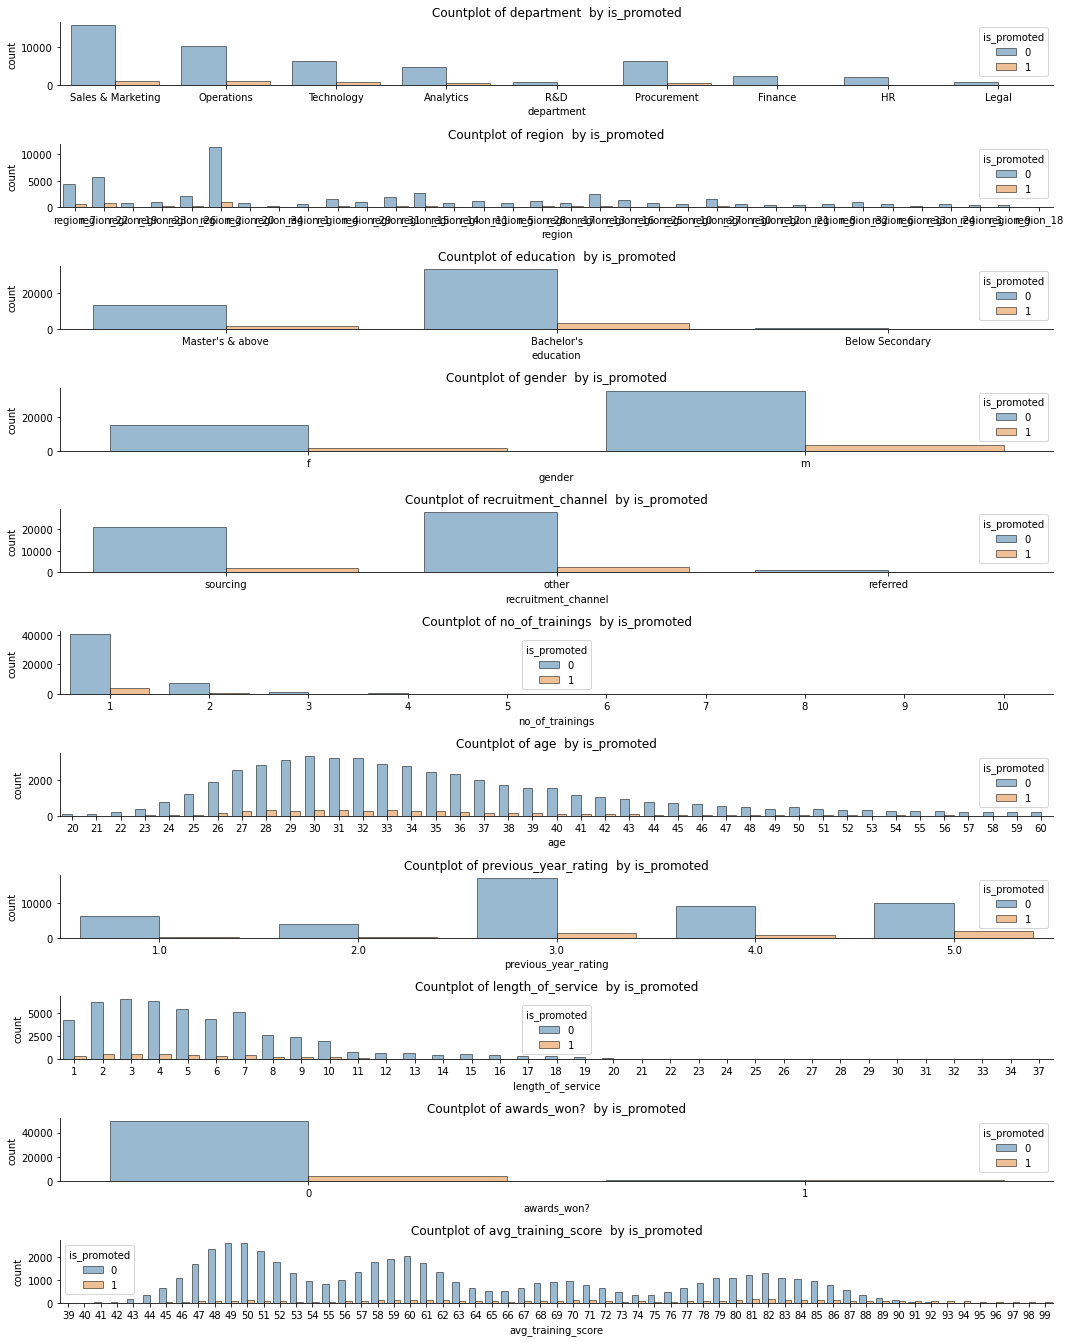

In [4]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[15,20])

fft=["department", "region","education", "gender","recruitment_channel","no_of_trainings", "age","previous_year_rating", "length_of_service", "awards_won?", "avg_training_score"]                   
n=1
for f in fft:
    plt.subplot(12,1,n)
    sns.countplot(x=f, hue='is_promoted', edgecolor="black", alpha=0.5, data=train)
    sns.despine()
    plt.title("Countplot of {}  by is_promoted".format(f))
    n=n+1
plt.tight_layout()
plt.show()

